In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.formula.api as smf
from scipy.cluster.hierarchy import dendrogram, linkage, leaves_list
import seaborn as sns
import statsmodels
# sns.set_theme(color_codes=True)


In [2]:
ann_df = pd.read_csv('all_annotated.csv')


In [3]:
np.log2(119.325905+0.1)

6.899971999253486

In [4]:
ann_df['median']=ann_df.loc[:,"male_10":"female_14D"].median(axis=1)#calculate the mean FPKM
ann_df.drop(ann_df[ann_df['median']<=0].index, inplace = True) #remove the rows with median<=0
FPKM_df=ann_df.copy()#make a deep copy of the original df
FPKM_df.loc[:,"male_10":"median"]=np.log2(ann_df.loc[:,"male_10":"median"]+0.1)#transfer the FPKM
FPKM_df

,t_name,gene_name,male_10,male_11,male_12,male_13,male_14A,male_14B,male_14C,male_14D,female_10,female_11,female_12,female_13,female_14A,female_14B,female_14C,female_14D,median
3,FBtr0302347,CR40182,4.573651,3.593093,4.383186,3.772605,4.240476,4.749679,4.518529,3.558602,4.459054,3.809626,4.051558,3.669331,4.995485,4.522507,3.851021,4.112914,4.178105
8,FBtr0113885,Parp,3.472120,-3.321928,-3.321928,-3.321928,3.897757,-3.321928,4.145813,3.436875,-3.321928,-3.321928,3.905799,3.869772,4.353582,2.066050,-3.321928,4.665883,2.908499
9,FBtr0301810,Alg-2,4.260622,-3.321928,3.900371,4.801878,4.484797,2.990301,3.801070,3.701063,4.222705,1.594158,4.209672,4.729653,4.784754,2.913181,2.897078,4.516802,4.063295
10,FBtr0113895,Tim17b,2.681610,2.012708,2.665469,6.130167,6.072718,2.945977,6.230339,5.750615,5.486961,4.081859,5.728691,6.286330,6.338167,4.998373,5.621212,6.280001,5.675952
11,FBtr0345179,Tim17b,6.899972,3.552258,6.909741,6.245611,6.188155,6.953605,6.345793,5.901059,5.602316,4.196805,5.844084,6.439396,6.453632,5.113628,5.736589,6.410012,6.217169
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34663,FBtr0100884,mt:Cyt-b,5.063561,0.209330,3.312209,8.696872,6.681296,4.675181,6.166922,6.945737,6.905339,-0.371506,5.597221,6.170259,7.891809,5.452891,6.239269,7.386673,6.168592
34665,FBtr0100886,mt:ND1,4.661599,-0.437467,4.418274,9.014515,8.350559,5.778312,8.493319,7.797501,8.259794,1.172241,7.649749,8.615611,8.760742,4.441070,6.523595,9.412730,7.725516
34667,FBtr0100888,mt:lrRNA,11.191931,5.095088,9.857502,12.271701,11.136488,9.213941,11.283776,10.690080,11.332554,6.260317,11.087133,11.867576,6.942632,8.818194,9.435277,12.153787,10.902223
34684,FBtr0114261,CR41590,-2.534805,-3.321928,-2.348207,-2.301821,-3.321928,-3.321928,-3.321928,-2.143405,0.003268,-3.321928,-3.321928,-1.927886,-1.913863,-3.321928,-3.321928,-2.713053,-2.985605


# Clustering

In [5]:
# generate the linkage matrix of genes
X_gene=FPKM_df.loc[:,"male_10":"female_14D"]
Z_gene=linkage(X_gene, 'ward')# [idx1, idx2, dist, sample_count]
leave_gene=leaves_list(Z_gene)

In [55]:
#generate the linkage matrix of samples
X_sample=FPKM_df.loc[:,"male_10":"female_14D"].T
Z_sample=linkage(X_sample, 'ward')# [idx1, idx2, dist, sample_count]
leave_sample=leaves_list(Z_sample)

In [56]:
leave_gene

array([4283, 5380,  242, ..., 1637, 3555, 7409], dtype=int32)

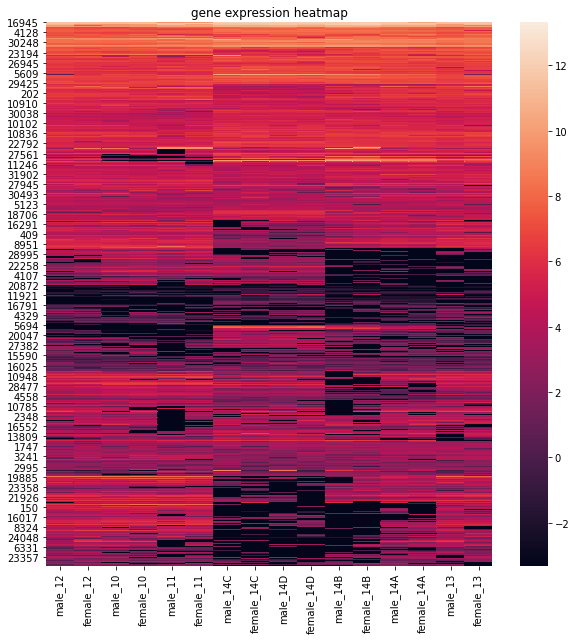

In [63]:
cols=[]
plt.figure(figsize=(10, 10))
for i in leave_sample:
    cols.append(list(X_gene.head())[i])
X_sample_sort = X_gene[cols] 
X_all_sort=X_sample_sort.iloc[leave_gene]
X_all_sort
ax = sns.heatmap(X_all_sort)
plt.title('gene expression heatmap')
plt.show()

/Users/xiangning/miniconda3/lib/python3.6/site-packages/seaborn/matrix.py:649: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


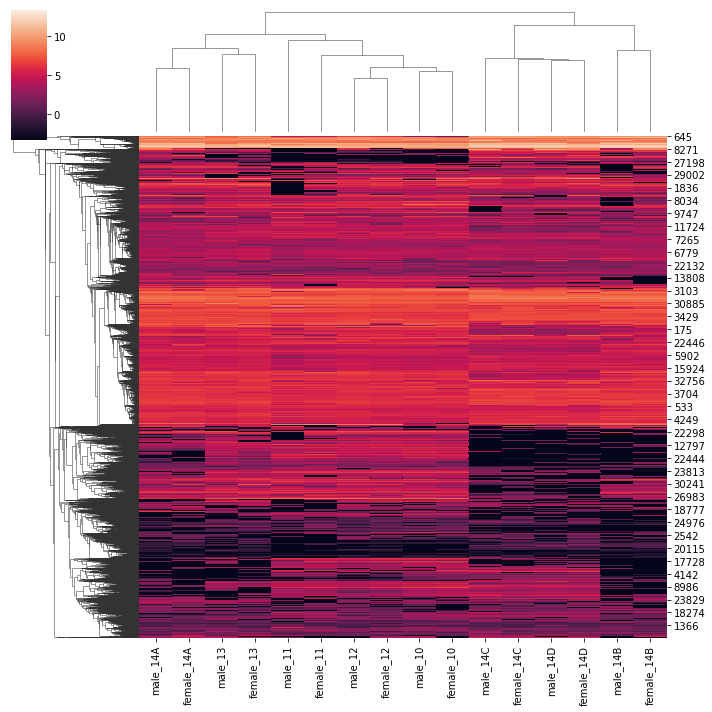

In [98]:
#heatmap with seaborn
g = sns.clustermap(FPKM_df.loc[:,"male_10":"female_14D"])
plt.savefig('heatmap')

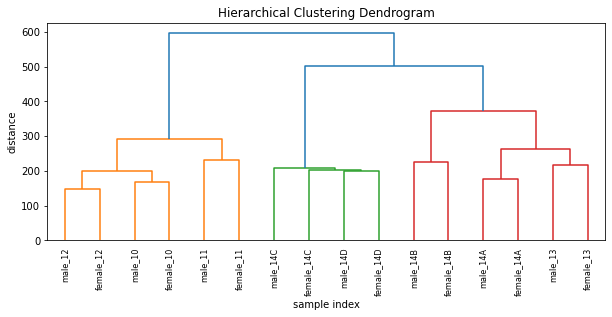

In [99]:
# calculate full dendrogram
plt.figure(figsize=(10, 4))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
labelList=list(FPKM_df.loc[:,"male_10":"female_14D"].head())
dendrogram(
    Z_sample,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,# font size for the x axis labels
    labels=labelList,
)
plt.savefig('dendrogram.png')
plt.show()

# Differential expression
## with stage

In [10]:
gene_FPKM_df=FPKM_df.loc[:,"male_10":"female_14D"].T
gene_FPKM_df.columns=FPKM_df.loc[:,"t_name"]
gene_FPKM_df['sex']=['male','male','male','male','male','male','male','male',
                 'female','female','female','female','female','female','female','female']
gene_FPKM_df['stage']=[10,11,12,13,14,14,14,14,10,11,12,13,14,14,14,14]


In [11]:
pvalue_stage=[]
for gene in list(gene_FPKM_df.head())[:-2]:
    mod = smf.ols(formula=str(gene)+'~stage+1', data=gene_FPKM_df)
    result = mod.fit()
    pvalue_stage.append(result.pvalues[1])
len(pvalue_stage)

8613

In [12]:
FPKM_df['stage_p']=pvalue_stage
FPKM_df['stage_logP']=-np.log10(FPKM_df['stage_p'])

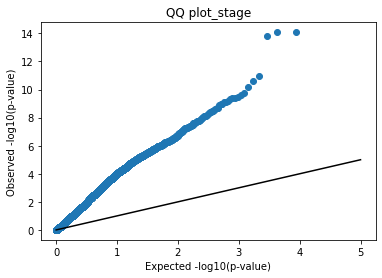

In [13]:
#QQ plot
#     dataframe['geneindex'] = range(len(FPKM))
FPKM_sorted = FPKM_df.sort_values(by = 'stage_p')
FPKM_sorted['uniform_points'] = range(0, len(FPKM_sorted))
FPKM_sorted['uniform_pval'] = (FPKM_sorted['uniform_points'] + 1) / len(FPKM_sorted)
FPKM_sorted['uniform_logP'] = -1 * np.log10(FPKM_sorted['uniform_pval'])
#     FPKM['snp_index'] = range(len(FPKM))
fig, ax = plt.subplots()
ax.scatter(FPKM_sorted["uniform_logP"], FPKM_sorted["stage_logP"])
ax.plot([5,0], [5, 0], color = "black")
plt.xlabel("Expected -log10(p-value)")
plt.ylabel("Observed -log10(p-value)")
plt.title("QQ plot_stage")
plt.savefig("QQ_plot_stage.png")
plt.show()

In [15]:
fdr_result=statsmodels.stats.multitest.fdrcorrection(pvalue_stage, alpha=0.1, method='indep', is_sorted=False)
FPKM_df['stage_cor_p']=fdr_result[1]
diff_gene_stage=FPKM_df[FPKM_df['stage_cor_p']<0.05]
diff_gene_stage

,t_name,gene_name,male_10,male_11,male_12,male_13,male_14A,male_14B,male_14C,male_14D,...,female_12,female_13,female_14A,female_14B,female_14C,female_14D,median,stage_p,stage_logP,stage_cor_p
32,FBtr0078962,CG12581,-3.321928,-3.321928,-3.321928,-3.321928,3.465782,4.839966,6.834119,7.222319,...,-3.321928,-3.321928,4.410834,4.547454,7.034024,7.175523,2.478781,0.000085,4.073112,0.000879
50,FBtr0078985,CG14641,6.637172,6.591033,6.890134,6.969027,7.518327,7.748548,7.948051,7.958587,...,6.821103,6.998032,7.378962,7.438458,7.957329,7.900571,7.201033,0.000002,5.693006,0.000078
51,FBtr0078967,abs,4.493204,4.469153,4.805691,4.852776,5.213607,5.128309,5.381846,5.374848,...,4.616802,4.826213,5.049368,5.347315,5.549579,5.340620,4.954418,0.000001,5.921953,0.000055
102,FBtr0078958,Vps24,5.481487,6.068599,5.399542,5.149944,5.102932,4.251967,4.073257,4.239095,...,5.667986,5.850765,4.770715,4.424194,3.916799,4.074388,5.126630,0.000373,3.428580,0.002647
111,FBtr0078955,CG9776,5.842058,5.039817,5.819435,6.168787,5.973715,5.587256,6.201391,5.983517,...,5.534782,5.941417,6.223571,5.641519,6.239260,6.377929,5.892593,0.015965,1.796821,0.046409
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34640,FBtr0100861,mt:CoI,6.373076,2.792871,5.785681,8.326924,9.147208,6.053799,7.820703,6.964940,...,6.855411,7.243006,10.412600,6.935831,6.714474,10.177214,6.896181,0.014927,1.826020,0.044136
34643,FBtr0100864,mt:tRNA:K,-0.666904,-0.612410,-3.321928,3.069504,3.770951,2.357381,2.952242,2.865792,...,0.743411,2.583839,5.493103,0.531897,1.901490,4.471517,2.237104,0.008424,2.074488,0.028253
34645,FBtr0100866,mt:ATPase8,-3.321928,-3.321928,-3.321928,-0.664672,1.525487,0.489144,0.705399,-3.321928,...,-3.321928,-1.372247,2.229300,-1.288332,0.836971,2.523567,-1.329680,0.000656,3.183224,0.004058
34649,FBtr0100870,mt:ND3,-3.321928,-3.321928,-3.321928,-3.321928,5.247958,-3.321928,5.119850,4.603723,...,-3.321928,3.015881,6.867815,3.190147,2.040126,6.731971,2.147358,0.012732,1.895097,0.039249


In [17]:
diff_gene_stage.to_csv ("differentially_expressed_genes_stage.csv", index = False, header=True)

## with day and sex

In [69]:
pvalue_sex=[]
beta_sex=[]
beta_stage=[]

for gene in list(gene_FPKM_df.head())[:-2]:
    
    mod = smf.ols(formula=str(gene)+' ~1+sex+stage', data=gene_FPKM_df)
    result = mod.fit()
    pvalue_sex.append(result.pvalues[2])
    beta_sex.append(result.params[1])
    beta_stage.append(result.params[2])
    
len(pvalue_sex)

8613

In [70]:
FPKM_df['sex_p']=pvalue_sex
FPKM_df['sex_logP']=-np.log10(FPKM_df['sex_p'])
FPKM_df['sex_beta']=beta_sex
FPKM_df['stage_beta']=beta_stage


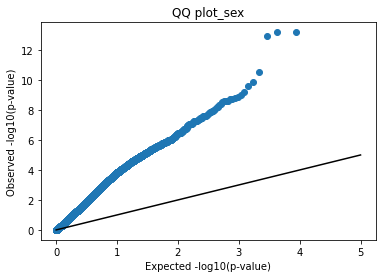

In [48]:
##QQ plot
FPKM_sorted = FPKM_df.sort_values(by = 'sex_p')
FPKM_sorted['uniform_points'] = range(0, len(FPKM_sorted))
FPKM_sorted['uniform_pval'] = (FPKM_sorted['uniform_points'] + 1) / len(FPKM_sorted)
FPKM_sorted['uniform_logP'] = -1 * np.log10(FPKM_sorted['uniform_pval'])
fig, ax = plt.subplots()
ax.scatter(FPKM_sorted["uniform_logP"], FPKM_sorted["sex_logP"])
ax.plot([5,0], [5, 0], color = "black")
plt.xlabel("Expected -log10(p-value)")
plt.ylabel("Observed -log10(p-value)")
plt.title("QQ plot_sex")
plt.savefig("QQ_plot_sex.png")
plt.show()

In [49]:
fdr_result_sex=statsmodels.stats.multitest.fdrcorrection(pvalue_sex, alpha=0.1, method='indep', is_sorted=False)
FPKM_df['sex_cor_p']=fdr_result_sex[1]


In [50]:
diff_gene_sex=FPKM_df[FPKM_df['sex_cor_p']<0.05]
diff_gene_sex
# diff_gene_day.to_csv ("differentially_expressed_genes_sex_and_day.csv", index = False, header=True)

,t_name,gene_name,male_10,male_11,male_12,male_13,male_14A,male_14B,male_14C,male_14D,...,female_14B,female_14C,female_14D,median,stage_p,stage_logP,stage_cor_p,sex_p,sex_logP,sex_cor_p
32,FBtr0078962,CG12581,-3.321928,-3.321928,-3.321928,-3.321928,3.465782,4.839966,6.834119,7.222319,...,4.547454,7.034024,7.175523,2.478781,8.450609e-05,4.073112,8.790471e-04,1.543307e-04,3.811548,0.001538
50,FBtr0078985,CG14641,6.637172,6.591033,6.890134,6.969027,7.518327,7.748548,7.948051,7.958587,...,7.438458,7.957329,7.900571,7.201033,2.027653e-06,5.693006,7.796506e-05,4.087391e-06,5.388554,0.000154
51,FBtr0078967,abs,4.493204,4.469153,4.805691,4.852776,5.213607,5.128309,5.381846,5.374848,...,5.347315,5.549579,5.340620,4.954418,1.196870e-06,5.921953,5.518467e-05,2.899826e-06,5.537628,0.000125
102,FBtr0078958,Vps24,5.481487,6.068599,5.399542,5.149944,5.102932,4.251967,4.073257,4.239095,...,4.424194,3.916799,4.074388,5.126630,3.727517e-04,3.428580,2.646752e-03,6.110195e-04,3.213945,0.004193
118,FBtr0078951,hkb,-3.321928,-3.321928,1.397440,2.464557,4.644593,5.561555,5.006473,5.538467,...,6.389426,5.678492,4.450326,4.105786,6.308141e-10,9.200099,4.179386e-07,2.578278e-09,8.588670,0.000001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34640,FBtr0100861,mt:CoI,6.373076,2.792871,5.785681,8.326924,9.147208,6.053799,7.820703,6.964940,...,6.935831,6.714474,10.177214,6.896181,1.492727e-02,1.826020,4.413614e-02,1.655394e-02,1.781099,0.049455
34643,FBtr0100864,mt:tRNA:K,-0.666904,-0.612410,-3.321928,3.069504,3.770951,2.357381,2.952242,2.865792,...,0.531897,1.901490,4.471517,2.237104,8.423878e-03,2.074488,2.825345e-02,1.065652e-02,1.972384,0.035343
34645,FBtr0100866,mt:ATPase8,-3.321928,-3.321928,-3.321928,-0.664672,1.525487,0.489144,0.705399,-3.321928,...,-1.288332,0.836971,2.523567,-1.329680,6.558064e-04,3.183224,4.057802e-03,9.067278e-04,3.042523,0.005585
34649,FBtr0100870,mt:ND3,-3.321928,-3.321928,-3.321928,-3.321928,5.247958,-3.321928,5.119850,4.603723,...,3.190147,2.040126,6.731971,2.147358,1.273219e-02,1.895097,3.924923e-02,1.092879e-02,1.961428,0.036024


In [52]:
diff_gene_sex_list=diff_gene_sex['t_name'].tolist()
diff_gene_stage_list=diff_gene_stage['t_name'].tolist()

In [54]:
count=0
for gene in diff_gene_sex_list:
    if gene in diff_gene_stage_list:
        count+=1
overlap=count
per_stage=count/len(diff_gene_stage_list)
per_sex=count/len(diff_gene_sex_list)

print(per_sex,per_stage)

0.9948168624740843 0.9526803441429517


- 99.48% of the gene differentially expressed related to stage overlapped to gene differentially expressed related to sex and stage

## volcano plot


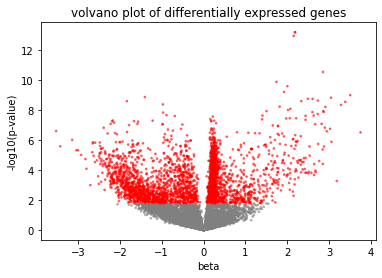

In [77]:
# FPKM_df['male_mean'] = FPKM_df.loc[:,"male_10":"male_14D"].mean(axis=1)
# FPKM_df['female_mean'] = FPKM_df.loc[:,"female_10":"female_14D"].mean(axis=1)
# FPKM_df['fold2change'] = (FPKM_df['female_mean']-FPKM_df['male_mean'])/FPKM_df['male_mean']

FPKM_df['col'] =np.where(FPKM_df['sex_cor_p']<0.05, 'red', 'grey')


fig,ax=plt.subplots()
plt.scatter(x=FPKM_df['stage_beta'],y=FPKM_df['sex_logP'],c=FPKM_df['col'],s=3,alpha=0.5)
plt.title('volvano plot of differentially expressed genes')
plt.xlabel('beta')
plt.ylabel('-log10(p-value)')
plt.savefig('volcano_plot.png')
plt.show()